# Nicla characterisation analysis
This Jupyter notebook is just providing a dump of the data and should not be used for production data analysis.

The date indicates midnight.

<>:27: SyntaxWarning: invalid escape sequence '\O'
<>:27: SyntaxWarning: invalid escape sequence '\O'
C:\Users\irock\AppData\Local\Temp\ipykernel_19684\3804641735.py:27: SyntaxWarning: invalid escape sequence '\O'
  ax1.set_ylabel('Resistance [k$\Omega$]')


,datetime,temperature,humidity,pressure,iaq,iaq_s,co2_eq,b_voc_eq,comp_t,comp_h,comp_g,gas,accuracy
0,2023-12-15 11:09:59.904780,25.37,29.0,1002.15,25,25,500,0.49,25.31,29.58,4,10926.0,0
1,2023-12-15 11:10:04.681260,25.26,29.0,1002.15,25,25,500,0.49,25.31,29.58,4,10926.0,0
2,2023-12-15 11:10:09.945039,25.19,29.0,1002.15,25,25,500,0.49,25.14,29.53,4,11123.0,0
3,2023-12-15 11:10:14.823297,25.12,29.0,1002.13,25,25,500,0.49,25.07,29.45,4,11135.0,0
4,2023-12-15 11:10:19.892573,25.06,28.0,1002.13,25,25,500,0.49,25.04,29.42,4,11219.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109544,2023-12-22 13:45:25.175894,27.56,35.0,977.49,49,35,542,0.58,27.49,35.15,5,31683.0,1
109545,2023-12-22 13:45:31.217438,27.57,35.0,977.45,46,34,537,0.57,27.49,35.14,5,31281.0,1
109546,2023-12-22 13:45:36.244379,27.56,35.0,977.45,45,34,536,0.57,27.50,35.13,5,31351.0,1
109547,2023-12-22 13:45:42.529495,27.56,35.0,977.47,46,34,537,0.57,27.49,35.14,5,31516.0,1


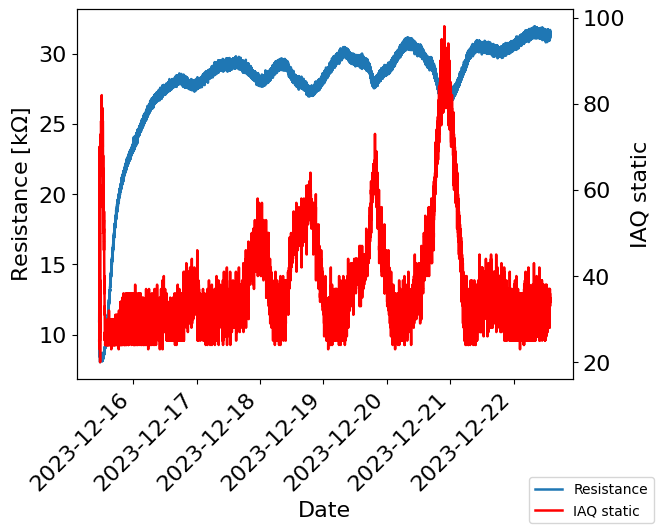

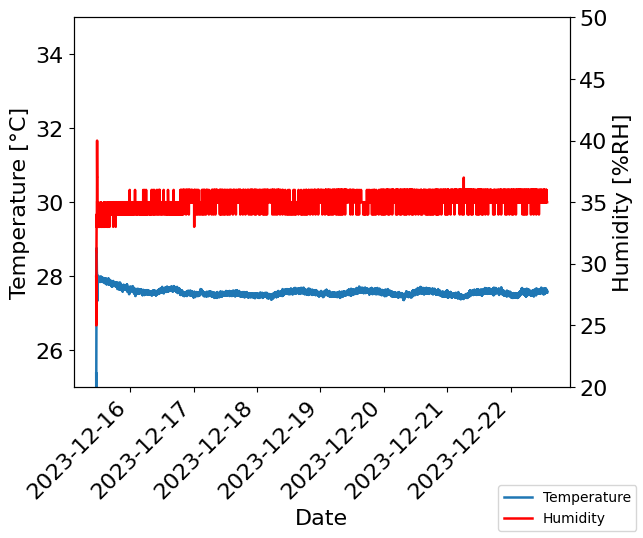

In [20]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# setting up matplotlib
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16

# load (partial, until 20/12) data
df = pd.read_csv('../data/nicla_2023_12_15_11_09_51.dat', sep='\t')
df = df.rename(columns={'humidity': 'temperature', 'temperature': 'humidity'})
# fix datetime field
datetime = pd.to_datetime(df['datetime'])
timedelta = datetime - datetime.iloc[0]
hours_elapsed = timedelta.dt.total_seconds()//3600

# show gas resistance data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(datetime, df['gas']/1000)
ax1.set_xlabel('Date')
ax1.set_ylabel('Resistance [k$\Omega$]')

ax2.plot(datetime, df['iaq_s'],color='r')
ax2.set_ylabel('IAQ static')

fig.legend(("Resistance","IAQ static"),loc="lower right")

for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

# show gas resistance data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(datetime, df['temperature'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature [°C]')
ax1.set_ylim((25, 35))

ax2.plot(datetime, df['humidity'],color='r')
ax2.set_ylabel('Humidity [%RH]')
ax2.set_ylim((20, 50))

fig.legend(("Temperature","Humidity"),loc="lower right")

for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

df